In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from konlpy.tag import Hannanum
from konlpy.tag import Okt
from konlpy.tag import Komoran
import sqlite3 as sq3
from pandas.io import sql
import os
import numpy as np

## read db file

In [2]:
def db_save(data, db_name, table_name):
    with sq3.connect(os.path.join('.',db_name)) as con: # sqlite DB 파일이 존재하지 않는 경우 파일생성
        try:
            data.to_sql(name = table_name, con = con, index = False, if_exists='replace') 
            #if_exists : {'fail', 'replace', 'append'} default : fail
        except Exception as e:
            print(str(e))
        print(len(data), '건 저장완료..')

In [3]:
def db_select(db_name, table_name):
    with sq3.connect(db_name) as con: 
        try:
            query = 'SELECT * FROM {}'.format(table_name)
            df = pd.read_sql(query, con = con)
        except Exception as e:
            print(str(e)) 
        return df  

In [4]:
def db_delete(db_name, table_name):
    with sq3.connect(db_name) as con: 
        try:
            cur = con.cursor()
            sql = 'DELETE FROM {}'.format(table_name)
            cur.execute(sql)
        except Exception as e:
            print(str(e))

In [5]:
def word_tokens(string):

    tokens_const = []

    for i in string.split(','):
        tokens_const.append(i)

    # 단어별 빈도를 담을 딕셔너리 생성하고, 빈도 계산
    const_word_count = dict()
    for word in tokens_const:
        const_word_count[word] = const_word_count.get(word, 0) + 1

    # 빈도를 key로 하여 단어를 빈도 역순으로 정렬
    sorted_word_count = sorted(const_word_count, key=const_word_count.get, reverse=True)

    n = sorted_word_count[:] # 빈도수 상위 20개의 단어를 추출
    w = [const_word_count[key] for key in n] # 20개 단어에 대한 빈도
    
    #n = sorted_word_count[:20] # 빈도수 상위 20개의 단어를 추출
    #w = [const_word_count[key] for key in n] # 20개 단어에 대한 빈도

    full_list = []

    for i in n,w:
        full_list.append(i)

    return full_list

# save word tokens into a file

In [6]:
DB_NAME = '경제_무역.db'
TABLE_NAME = '경제_무역_토큰화'
df = db_select(DB_NAME,TABLE_NAME)

In [7]:
temp_df = df.copy()

strings_t = []
strings_c = []

for i in temp_df.iloc[:,4]:
    string_token = ""
    string_count = ""
    
    token_set = word_tokens(i)
    string_token = ",".join(token_set[0])
    
    n = map(str,token_set[1])
    n = list(n)
    string_count = ",".join(n)

    strings_t.append(string_token)
    strings_c.append(string_count)
    
temp_df['tokens'] = strings_t
temp_df['counts'] = strings_c

temp_df.iloc[:,[0,5,6]]

,제목,tokens,counts
0,"[EU 경제통상 리포트(22-26)] EU, 에너지 위기 대응 긴급 조치 발표","에너지,대응,수요,집행위,러시아發,긴급,조치,감축,의무,가격,조정책수익,연대,기여금...","3,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1"
1,[미국경제통상리포트(US22-33)]美 연방준비은행 페드나우(Fed Now) 출시 ...,"도입,금융기관,시범,내년,전격,출시,전망,페드나우,비용,절감,효과,접근성,시스템,취...","4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1"
2,숫자로 보는 세계 70개 항구 적체 현황 리포트(9월 호),"선박,현황,항구,작업,A빅데이터,기반,해상운송,정보,스타트업,씨벤티지SeaVanta...","5,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1"
3,미국 국가 생명공학 및 바이오 제조 이니셔티브(9.12) 주요 내용,"생명공학,제조,생산,강화,후속조치,산업,자국내,골자,이니셔티브,행정명령,국내,예산,...","5,4,3,3,3,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,..."
4,[미국경제통상리포트(US22-32)]미국의 전기차 배터리용 핵심 광물 확보 전략,"생산,인플레이션,감축법,전기차EV,산업,재편,가속화,미국,배터리,핵심,광물,확보,당...","2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
...,...,...,...
292,2020년 중국 주요경제지표,"중국,성장률,소비,전망,경제성장률,총액,위안,돌파,연간,기록,플러스성장,생산,회복세...","3,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
293,2020년 중국 대외교역 현황 및 전망,"전망,현황,수출입,중국,대외교역,교역액,전년,대비,증가…코로,악재,사상,최대,수출․...","3,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1"
294,미국 디지털 화폐 추진 동향 및 전망,"디지털,도입,미국,화폐,추진,동향,전망,중국,상용화,지위,유지,연방정부,위안,미국의...","4,4,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,..."
295,중국 외국인투자 장려산업 목록 주요 내용과 평가 및 시사점,"외국,목록,장려산업,전국,시사점,중서부,중국,기존,대비,시행,지역,우대산업,기업,신...","4,4,3,3,2,2,1,1,1,1,1,1,1,1,1,1,1"


In [8]:
db_save(temp_df, DB_NAME, '뉴스레터_토큰화2')
#db_save_as_csv(temp_df)

297 건 저장완료..


In [9]:
df1 = db_select(DB_NAME, '뉴스레터_토큰화2')
df1 = df1.iloc[:,[0,4]].copy()
df1

,제목,BoW
0,"[EU 경제통상 리포트(22-26)] EU, 에너지 위기 대응 긴급 조치 발표","집행위,러시아發,에너지,대응,긴급,조치,수요,감축,의무,에너지,가격,조정책수익,연대..."
1,[미국경제통상리포트(US22-33)]美 연방준비은행 페드나우(Fed Now) 출시 ...,"금융기관,시범,도입,내년,전격,출시,전망,페드나우,도입,비용,절감,효과,접근성,시스..."
2,숫자로 보는 세계 70개 항구 적체 현황 리포트(9월 호),"A빅데이터,기반,해상운송,정보,스타트업,씨벤티지SeaVantage,협력,항만,적체,..."
3,미국 국가 생명공학 및 바이오 제조 이니셔티브(9.12) 주요 내용,"대통령,산업,자국내,생산,강화,골자,하는국,생명공학,제조,이니셔티브,행정명령,후속조..."
4,[미국경제통상리포트(US22-32)]미국의 전기차 배터리용 핵심 광물 확보 전략,"인플레이션,감축법,전기차EV,산업,재편,가속화,미국,배터리,생산,핵심,광물,확보,당..."
...,...,...
292,2020년 중국 주요경제지표,"중국,중국,경제성장률,총액,위안,돌파,연간,성장률,기록,플러스성장,생산,회복세,지속..."
293,2020년 중국 대외교역 현황 및 전망,"중국,대외교역,현황,전망,수출입,현황,교역액,전년,대비,증가…코로,악재,사상,최대,..."
294,미국 디지털 화폐 추진 동향 및 전망,"미국,디지털,화폐,추진,동향,전망,동향,연방정부,중국,디지털,위안,도입,상용화,미국..."
295,중국 외국인투자 장려산업 목록 주요 내용과 평가 및 시사점,"중국,외국,장려산업,목록,시사점,외국,장려산업,목록,기존,대비,시행,목록,전국,전국..."


# 단어의 총 등장 횟수 구하기

In [10]:
total_t = dict()

for i in df.iloc[:,4]:
    tokens_const = []
    
    for j in i.split(','):
        tokens_const.append(j)
    
    for each_t in tokens_const:
        if each_t in total_t.keys():
            total_t[each_t] += 1
        else :
            total_t[each_t] = 1

In [11]:
total_t_list = sorted(total_t.items(), key=lambda x:x[1], reverse=True)
orderdict = dict(total_t_list)
orderdict

{'전망': 271,
 '중국': 241,
 '미국': 174,
 '공급망': 173,
 '강화': 162,
 '정책': 160,
 '추진': 156,
 '정부': 151,
 '일본': 148,
 '에너지': 116,
 '대응': 114,
 '경제': 114,
 '수출': 111,
 '러시아': 109,
 '기업': 109,
 '글로벌': 105,
 '지원': 100,
 '동향': 100,
 '우려': 91,
 '지속': 88,
 '인도': 85,
 '회복': 74,
 '확보': 71,
 '상승': 70,
 '공급': 67,
 '성장': 65,
 '조치': 64,
 '수입': 64,
 '가격': 63,
 '산업': 63,
 '시사점': 63,
 '가능성': 62,
 '시행': 61,
 '중심': 60,
 '인플레이션': 58,
 '베트남': 58,
 '생산': 57,
 '세계': 57,
 '경기': 57,
 '확산': 57,
 '계획': 53,
 '완화': 53,
 '개최': 53,
 '사태': 53,
 '반도체': 52,
 '시장': 51,
 '대비': 51,
 '원자재': 51,
 '디지털': 49,
 '리스크': 49,
 '향후': 47,
 '유지': 47,
 '경제통상': 47,
 '현황': 46,
 '해외': 45,
 '교역': 44,
 '회복세': 44,
 '수요': 43,
 '제재': 43,
 '이슈': 43,
 '기록': 43,
 '도입': 42,
 '결과': 42,
 '둔화': 41,
 '필리핀': 38,
 '가스': 38,
 '법안': 38,
 '러우': 37,
 '인프라': 37,
 '싱가포르': 37,
 '감소': 36,
 '세부': 36,
 '전환': 36,
 '유럽': 36,
 '원유': 36,
 '목표': 36,
 '대통령': 35,
 '인도네시아': 35,
 '경제성장': 35,
 '환율': 35,
 '소비': 35,
 '기술': 34,
 '최대': 34,
 '협력': 33,
 '현지': 33,
 '압력': 33,
 '전문': 33

In [12]:
# using loop to iterate keys of dictionary
new_dict = {}
for key in orderdict:
    if not (isinstance(orderdict[key], int) and orderdict[key] > 100):
        new_dict[key] = orderdict[key]
new_dict

{'지원': 100,
 '동향': 100,
 '우려': 91,
 '지속': 88,
 '인도': 85,
 '회복': 74,
 '확보': 71,
 '상승': 70,
 '공급': 67,
 '성장': 65,
 '조치': 64,
 '수입': 64,
 '가격': 63,
 '산업': 63,
 '시사점': 63,
 '가능성': 62,
 '시행': 61,
 '중심': 60,
 '인플레이션': 58,
 '베트남': 58,
 '생산': 57,
 '세계': 57,
 '경기': 57,
 '확산': 57,
 '계획': 53,
 '완화': 53,
 '개최': 53,
 '사태': 53,
 '반도체': 52,
 '시장': 51,
 '대비': 51,
 '원자재': 51,
 '디지털': 49,
 '리스크': 49,
 '향후': 47,
 '유지': 47,
 '경제통상': 47,
 '현황': 46,
 '해외': 45,
 '교역': 44,
 '회복세': 44,
 '수요': 43,
 '제재': 43,
 '이슈': 43,
 '기록': 43,
 '도입': 42,
 '결과': 42,
 '둔화': 41,
 '필리핀': 38,
 '가스': 38,
 '법안': 38,
 '러우': 37,
 '인프라': 37,
 '싱가포르': 37,
 '감소': 36,
 '세부': 36,
 '전환': 36,
 '유럽': 36,
 '원유': 36,
 '목표': 36,
 '대통령': 35,
 '인도네시아': 35,
 '경제성장': 35,
 '환율': 35,
 '소비': 35,
 '기술': 34,
 '최대': 34,
 '협력': 33,
 '현지': 33,
 '압력': 33,
 '전문': 33,
 '증가': 33,
 '미얀마': 33,
 '활용': 32,
 '전기차': 32,
 '인상': 32,
 '총리': 32,
 '전쟁': 32,
 '안정적': 31,
 '금리': 31,
 '중단': 31,
 '물류': 31,
 '구축': 31,
 '상황': 31,
 '사업': 31,
 '우크라': 30,
 '효과': 29,
 '수준': 29,
 '태

## row 하나에 단어 하나 이상 있을 수 있는 비율 계산

In [13]:
df = db_select(DB_NAME,'뉴스레터_토큰화2')

In [14]:
wordUsage = dict()     # dictionary for the rate of how many articles have this word

for key in orderdict:
    exis = 0
    
    for eachRow in df1.iloc[:,1]:
        tokens_const = []
    
        for j in eachRow.split(','):
            tokens_const.append(j)

        if (str(key) in tokens_const):
            exis += 1
            
    wordUsage[key] = exis/len(df)*100     # gets the percentage of articles that have the word

In [15]:
wordUsage_list = sorted(wordUsage.items(), key=lambda x:x[1], reverse=True)
wordUsage_ordered = dict(wordUsage_list)
wordUsage_ordered

{'전망': 46.12794612794613,
 '미국': 34.00673400673401,
 '중국': 30.303030303030305,
 '정책': 30.303030303030305,
 '강화': 28.619528619528616,
 '정부': 26.599326599326602,
 '추진': 25.925925925925924,
 '동향': 24.579124579124578,
 '경제': 23.905723905723907,
 '기업': 22.895622895622896,
 '글로벌': 21.21212121212121,
 '공급망': 20.875420875420875,
 '대응': 20.53872053872054,
 '수출': 18.51851851851852,
 '에너지': 17.845117845117844,
 '시사점': 17.845117845117844,
 '인도': 16.835016835016837,
 '가능성': 16.4983164983165,
 '지속': 16.161616161616163,
 '개최': 16.161616161616163,
 '일본': 15.824915824915825,
 '러시아': 15.824915824915825,
 '경제통상': 15.824915824915825,
 '지원': 15.488215488215488,
 '우려': 14.814814814814813,
 '베트남': 14.814814814814813,
 '조치': 14.47811447811448,
 '산업': 14.47811447811448,
 '시장': 14.14141414141414,
 '대비': 14.14141414141414,
 '생산': 13.804713804713806,
 '완화': 13.804713804713806,
 '확산': 13.468013468013467,
 '시행': 13.131313131313133,
 '계획': 13.131313131313133,
 '향후': 13.131313131313133,
 '해외': 13.131313131313133,
 '상

In [16]:
# 가중치 줘보기
orderdict_values = orderdict.values()
total_sum = sum(orderdict_values)
dict_word_usage = dict()

for key in wordUsage_ordered:
    dict_word_usage[key] = wordUsage_ordered[key]*((orderdict[key]/total_sum))
    
sort_list = sorted(wordUsage_ordered.items(), key=lambda x:x[1], reverse=True)
wordUsage_ordered2 = dict(sort_list)
wordUsage_ordered2 
#wordUsage_ordered2 = 전체 기사 중 해당단어가 사용되는 기사 비율

{'전망': 46.12794612794613,
 '미국': 34.00673400673401,
 '중국': 30.303030303030305,
 '정책': 30.303030303030305,
 '강화': 28.619528619528616,
 '정부': 26.599326599326602,
 '추진': 25.925925925925924,
 '동향': 24.579124579124578,
 '경제': 23.905723905723907,
 '기업': 22.895622895622896,
 '글로벌': 21.21212121212121,
 '공급망': 20.875420875420875,
 '대응': 20.53872053872054,
 '수출': 18.51851851851852,
 '에너지': 17.845117845117844,
 '시사점': 17.845117845117844,
 '인도': 16.835016835016837,
 '가능성': 16.4983164983165,
 '지속': 16.161616161616163,
 '개최': 16.161616161616163,
 '일본': 15.824915824915825,
 '러시아': 15.824915824915825,
 '경제통상': 15.824915824915825,
 '지원': 15.488215488215488,
 '우려': 14.814814814814813,
 '베트남': 14.814814814814813,
 '조치': 14.47811447811448,
 '산업': 14.47811447811448,
 '시장': 14.14141414141414,
 '대비': 14.14141414141414,
 '생산': 13.804713804713806,
 '완화': 13.804713804713806,
 '확산': 13.468013468013467,
 '시행': 13.131313131313133,
 '계획': 13.131313131313133,
 '향후': 13.131313131313133,
 '해외': 13.131313131313133,
 '상

In [17]:
# 가중치 줘보기
wordusage_values = wordUsage_ordered.values()
total_sum = sum(wordusage_values)
dict_word_usage2 = dict()

for key in wordUsage_ordered:
    dict_word_usage2[key] = orderdict[key]*((wordUsage_ordered[key]/total_sum))

new_sum = sum(dict_word_usage2.values())
for key in dict_word_usage2:
    dict_word_usage2[key] =  dict_word_usage2[key]/new_sum*100
    
sort_list = sorted(dict_word_usage2.items(), key=lambda x:x[1], reverse=True)
wordUsage_ordered3 = dict(sort_list)
wordUsage_ordered3

{'전망': 8.836753200696897,
 '중국': 5.162527996420818,
 '미국': 4.182861549520491,
 '정책': 3.42740447895158,
 '강화': 3.2774555329974477,
 '추진': 2.859026569525443,
 '정부': 2.8392713909314864,
 '공급망': 2.5529403084190725,
 '경제': 1.9264869342107007,
 '기업': 1.7641612498603547,
 '동향': 1.737503659468509,
 '일본': 1.6556267746935547,
 '대응': 1.6551507462937005,
 '글로벌': 1.5744639325183818,
 '에너지': 1.4633113011523826,
 '수출': 1.4530766905555135,
 '러시아': 1.21934674622701,
 '지원': 1.094865319665088,
 '인도': 1.0115603496905705,
 '지속': 1.0053719804924635,
 '우려': 0.953008856508481,
 '시사점': 0.7947294135568975,
 '가능성': 0.7230871393788124,
 '조치': 0.6550150781996353,
 '산업': 0.644780467602766,
 '상승': 0.6331177718063334,
 '베트남': 0.6074122382141967,
 '개최': 0.6055081246147792,
 '성장': 0.5878950738201668,
 '공급': 0.5740902502243895,
 '가격': 0.5698059946257001,
 '시행': 0.5662357816267923,
 '회복': 0.5636176254275931,
 '생산': 0.55623918522985,
 '확산': 0.5426723758340001,
 '경제통상': 0.5257733676391694,
 '수입': 0.5179188990415721,
 '완화':

In [18]:
print(list(wordUsage_ordered3.keys())[:20])
print(list(wordUsage_ordered2.keys())[:20])
print(list(wordUsage_ordered.keys())[:20])

['전망', '중국', '미국', '정책', '강화', '추진', '정부', '공급망', '경제', '기업', '동향', '일본', '대응', '글로벌', '에너지', '수출', '러시아', '지원', '인도', '지속']
['전망', '미국', '중국', '정책', '강화', '정부', '추진', '동향', '경제', '기업', '글로벌', '공급망', '대응', '수출', '에너지', '시사점', '인도', '가능성', '지속', '개최']
['전망', '미국', '중국', '정책', '강화', '정부', '추진', '동향', '경제', '기업', '글로벌', '공급망', '대응', '수출', '에너지', '시사점', '인도', '가능성', '지속', '개최']


In [19]:
for i in list(wordUsage_ordered.keys()):
    print(i)

전망
미국
중국
정책
강화
정부
추진
동향
경제
기업
글로벌
공급망
대응
수출
에너지
시사점
인도
가능성
지속
개최
일본
러시아
경제통상
지원
우려
베트남
조치
산업
시장
대비
생산
완화
확산
시행
계획
향후
해외
상승
성장
가격
이슈
사태
공급
세계
중심
현황
수입
유지
회복
리스크
세부
전문
반도체
수요
확보
기록
인플레이션
경기
제재
결과
필리핀
싱가포르
전환
인도네시아
원자재
도입
목표
현지
최신
뉴스
한국
대통령
최대
금주
기초상식
돋보기
소식통
협력
사업
감소
경제성장
미얀마
물류
상황
수준
태국
디지털
러우
증가
인상
우크라
기업들
라오스
교역
둔화
원유
금리
구축
말레이시아
조정
부족
법안
유럽
환율
소비
전기차
봉쇄조치
가속화
올해
효과
기준
국내
기존
의회
인니
가스
기술
중단
투자
검토
집행위
제조업
규모
하락
규제
봉쇄
품목
캄보디아
회복세
인프라
활용
안정적
비중
변화
기조
육성
전년
전략
천연가스
불확실성
작용
요구
입법
기대
참조
개발
가능
장기화
급증
지역
반응
문의처
개선
가운데
성장률
주목
무역
심화
방안
러시아산
방향
자동차
상담회
압력
전쟁
조사
내수
금융
제품
달성
불안
상존
국제
의존도
수급
공개
기회
금지
신규
위축
업계
이전
요약
멕시코
프로젝트
경제동향
촉진
석탄
상승세
안보
달러
강세
개요
감축
재편
인센티브
연속
기관
총리
수출입
친환경
상반기
강조
전력
방역
배터리
對러
경제성장률
축소
악화
발전
핵심
모니터링
부문
소식
정보
개정
외국
수립
불구
재생에너지
중앙은행
성장세
존재
서방
탄소중립
활성화
연준
석유
채택
첨부
안정
탄소
운영
백신
기후변화
경제안보
중소기업
기반
호조
재확산
부진
공장
대규모
사용
관리
집중
국가
약화
제시
재개
진출
정상화
행정부
연간
침체
가중
여파
제외
전체
하향
본격화
점검
우리기업
하방
식량
오미크론
실시
보조금
EU러시아
유럽의회
침공
반면
기대감
증대
통화
상원
발효
요청
입장
사상
역내
실적
건설
유치
실현
러시아우크라이
비용
민간
해결
철강
입국
대표
방침
제조
회의

얼마남지
이변
마약
반군
진압
재정비
대중교통
산림보호
이슈별
주민
폴불
자리
중국계
해운운
상하이컨테이너운임지수SCF
테슬라
희귀광물
진퇴양난
농산품
신시장…
중국사무소
부존생산
강내영양지원무역협회
전문가들
시각놈
촘스키
박노벽
前대사
홍현익
원장
국민연합르펜
절충원자력
연금법
협력공조
ㅁ전망
협력진출
對기업정책
기업부가가치부담금CVAE
행정절차
親기업
품귀
야자원료
재정적자
대통령예산안
국방예산
조세
개편안
긴급조치
부채문제
수입제한
수입거래
외화유출
신용장
외화반출
수출입관리청GOEC
제조공장
규제정보
수출입관리청
수입규제
해외시장뉴스
질의응답
갱신
대이집트
문의
홈페이지
등록
미연준
통화대비
하락폭
금리차이
금리차
국채매입
장기금리
해외이전
투자수익
해외생산비율
해외투자확
국외
배당
회수
해외외화
회복세로
효과수출
효과수입물
소비위축
수출형
경영악화
가격인상
전가
해외법인
계상시
도요타
혼다
닛산자동차
순이익
컨센서스
해외현지법인
수익증가분
생활필수품
수입물가
중일본경제신문
충격요인
경제변화
구로
표명일본경제신문
수출증대
한국기업
변동률
조사한
상승효과
반감다이와증권
수출경합도
업종석유화학
전자자동차부품
시차
경제전반
중국인민은행
상하이시
진출기업공급망
제조용
희소가스
미국수출입은행EXM
구입
그린플레이션Greenflation
야스유키일본
와세다대
회귀
사이버위협
예방
콩고민주공화국
한국일보
김연규
한양대
오피니언
외환조치
동부경제회랑
중진국
탈출
한베
수교
투자촉진회의
위험성
공시안
피해기업
지원책
도로수로철
운송업
항공업
중고위험
고위험지역
중위험지역
영세기업
면세
세금비용
검사방역
대출
구입비
간이과세
교육비
보조
양로보험국민연금
사회보험
자원세수자원세
도시유지건설세
부동산세
도시토지사용세
인지세
경작지
점용세
부가세
교육부가세
지방교육부가세
비용지원
국유기업
영업용
위험도
불가항력
증명
융자지원
보증료율
대출이자
장쑤성
화물트럭
고속
통행료
전액
구매지원
산동성
구매시
공제
실업보험
환급
해고율
실업보험료
환급중기
봉쇄지역
쿤산
타이창
코로나수입

### drop keys where the word does not have a significant meaning

In [20]:
# using loop to iterate keys of dictionary
new_dict2 = {}
for key in wordUsage_ordered3:
    #if not (isinstance(wordUsage_ordered3[key], int) and wordUsage_ordered3[key] > 1):
    if not (wordUsage_ordered3[key] > 1):
        new_dict2[key] = wordUsage_ordered3[key]
new_dict2

{'우려': 0.953008856508481,
 '시사점': 0.7947294135568975,
 '가능성': 0.7230871393788124,
 '조치': 0.6550150781996353,
 '산업': 0.644780467602766,
 '상승': 0.6331177718063334,
 '베트남': 0.6074122382141967,
 '개최': 0.6055081246147792,
 '성장': 0.5878950738201668,
 '공급': 0.5740902502243895,
 '가격': 0.5698059946257001,
 '시행': 0.5662357816267923,
 '회복': 0.5636176254275931,
 '생산': 0.55623918522985,
 '확산': 0.5426723758340001,
 '경제통상': 0.5257733676391694,
 '수입': 0.5179188990415721,
 '완화': 0.5172048564417905,
 '시장': 0.5098264162440475,
 '대비': 0.5098264162440475,
 '확보': 0.5069702458449211,
 '중심': 0.4998298198471054,
 '계획': 0.4919753512495082,
 '세계': 0.4884051382506001,
 '사태': 0.4667458460572256,
 '향후': 0.4362800284665449,
 '해외': 0.4177149208722239,
 '인플레이션': 0.4003398842775387,
 '경기': 0.39343747247965016,
 '이슈': 0.38891520268103347,
 '반도체': 0.3836788902826352,
 '현황': 0.38320286188278085,
 '리스크': 0.37320626548583863,
 '유지': 0.3691600240870764,
 '원자재': 0.3398842774960316,
 '수요': 0.31727292850294836,
 '기록': 0.3070383

## graph of hannanum

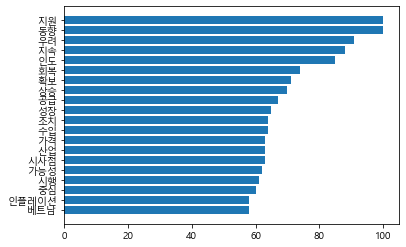

In [21]:
from matplotlib import font_manager, rc

# 그래프에서 사용할 한글 폰트를 지정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# plt.barh로 그래프 출력
n = list(new_dict.keys())[:20][::-1] # 빈도수 상위 20개의 단어를 추출해 역순으로 정렬
w = list(new_dict.values())[:20][::-1] # 20개 단어에 대한 빈도

plt.barh(range(20),w,tick_label=n) # 수평 막대그래프
plt.show()

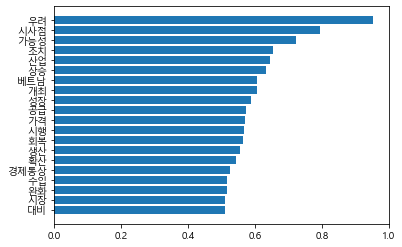

In [22]:
# plt.barh로 그래프 출력
new_dict_new1 = {}
for key in wordUsage_ordered3:
    #if not (isinstance(wordUsage_ordered3[key], int) and wordUsage_ordered3[key] > 1):
    if not (wordUsage_ordered3[key] > 1):
        new_dict_new1[key] = wordUsage_ordered3[key]

n = list(new_dict_new1.keys())[:20][::-1] # 빈도수 상위 20개의 단어를 추출해 역순으로 정렬
w = list(new_dict_new1.values())[:20][::-1] # 20개 단어에 대한 빈도

plt.barh(range(20),w,tick_label=n) # 수평 막대그래프
plt.show()

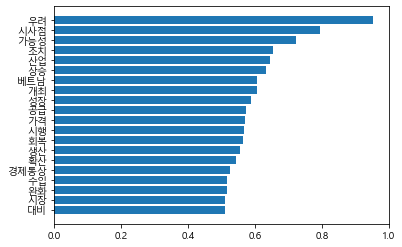

In [23]:
# plt.barh로 그래프 출력
new_dict_new2 = {}
for key in new_dict2:
    #if not (isinstance(wordUsage_ordered3[key], int) and wordUsage_ordered3[key] > 1):
    if not (new_dict2[key] > 1):
        new_dict_new2[key] = new_dict2[key]

n = list(new_dict_new2.keys())[:20][::-1] # 빈도수 상위 20개의 단어를 추출해 역순으로 정렬
w = list(new_dict_new2.values())[:20][::-1] # 20개 단어에 대한 빈도

plt.barh(range(20),w,tick_label=n) # 수평 막대그래프
plt.show()

In [24]:
# 단어별 빈도를 담을 딕셔너리 생성
tokens_const1 = list(new_dict.keys())
tokens_const_count1 = list(new_dict.values())

i_count = map(int, tokens_const_count1)
tokens_const_count1 = list(i_count)

token_word_count1 = dict(zip(tokens_const1, tokens_const_count1))

In [25]:
# 단어별 빈도를 담을 딕셔너리 생성
tokens_const2 = list(new_dict_new2.keys())
tokens_const_count2 = list(np.array(list(new_dict_new2.values()))*1000)

i_count = map(int, tokens_const_count2)
tokens_const_count2 = list(i_count)

token_word_count2 = dict(zip(tokens_const2, tokens_const_count2))

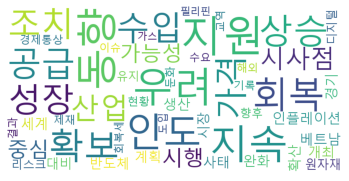

In [26]:
# WordCloud 객체에 전달할 폰트주소 생성
font_path = 'c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 100, # 최대 폰트 크기
    width = 800, # 이미지 너비
    height = 400, # 이미지 높이
    background_color='white', # 이미지 배경색
    max_words=50) # 최대 단어 수

# 원문이 아닌 형태소 분석 결과로부터 워드 클라우드 생성
wordcloud.generate_from_frequencies(token_word_count1)
wordcloud.to_file('경제_무역.png') # 생성한 이미지를 파일로 저장
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

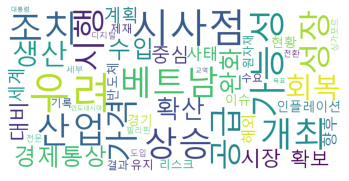

In [27]:
# WordCloud 객체에 전달할 폰트주소 생성
font_path = 'c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 100, # 최대 폰트 크기
    width = 800, # 이미지 너비
    height = 400, # 이미지 높이
    background_color='white', # 이미지 배경색
    max_words=50) # 최대 단어 수

# 원문이 아닌 형태소 분석 결과로부터 워드 클라우드 생성
wordcloud.generate_from_frequencies(token_word_count2)
wordcloud.to_file('경제_무역2.png') # 생성한 이미지를 파일로 저장
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

### 단어 분포 탐색

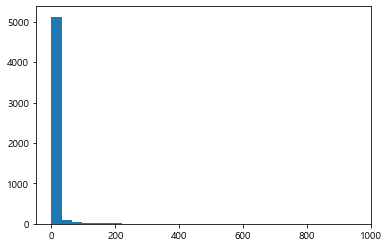

In [28]:
plt.hist(list(token_word_count2.values()), bins=30)
plt.show()